# Section 1

1. Run a PCA based on quantitative environmental variables ('Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul'), using sites from the Douro and Tejo basins. Produce a biplot with ‘ Catchment_name ’ as a grouping. 

In [33]:
import pandas as pd
import zipfile
import seaborn as sns # For plotting
import matplotlib.pyplot as plt # For showing plots 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")
df = df.dropna() # drops rows when at least one element is a missing value
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 2822 entries, 18 to 5010
Columns: 164 entries, Site_code to Iberochondrostoma_sp
dtypes: float64(38), int64(120), object(6)
memory usage: 3.6+ MB


,Site_code,Latitude,Longitude,Country,Catchment_name,Galiza,Subsample,Calib_EFI_Medit,Calib_connect,Calib_hydrol,...,Squalius malacitanus,Squalius pyrenaicus,Squalius torgalensis,Thymallus thymallus,Tinca tinca,Zingel asper,Squalius sp,Barbatula sp,Phoxinus sp,Iberochondrostoma_sp
18,ES_03_0001,41.957268,-2.926857,Spain,Douro,0,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
19,ES_03_0002,41.850818,-2.591150,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
28,ES_03_0012,41.498026,-5.528753,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
32,ES_03_0016,41.586853,-3.072064,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
43,ES_03_0029,41.830177,-3.782420,Spain,Douro,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [34]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Suponiendo que df es tu DataFrame cargado previamente

# Filtrar los datos para incluir solo las cuencas de Douro y Tejo y seleccionar las columnas deseadas
df = df[df['Catchment_name'].isin(['Douro', 'Tejo'])][['Catchment_name', 'Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']]

# Seleccionar las columnas numéricas para el escalado
numeric_columns = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']

# Escalar los datos numéricos
scaler = StandardScaler()
df_scaled_numeric = scaler.fit_transform(df[numeric_columns])

# Convertir a DataFrame y mantener las columnas originales
df_scaled = pd.DataFrame(data=df_scaled_numeric, columns=numeric_columns)

# Añadir de nuevo la columna 'Catchment_name' al DataFrame escalado
df_scaled['Catchment_name'] = df['Catchment_name'].values

# Mostrar los primeros registros del DataFrame escalado
df_scaled.head()


,Altitude,Actual_river_slope,Elevation_mean_catch,prec_ann_catch,temp_ann,temp_jan,temp_jul,Catchment_name
0,3.002541,-0.635303,3.274284,-0.591536,-2.756492,-2.389199,-2.215321,Douro
1,2.481245,-0.500834,2.020549,-1.235061,-2.159600,-2.055191,-1.463074,Douro
2,0.994996,-0.619693,0.983347,-1.782173,-0.965816,-1.387173,-0.397390,Douro
3,1.934069,-0.462048,1.368290,-1.622130,-1.725497,-1.846435,-0.898889,Douro
4,1.867521,-0.425049,1.040247,-1.762416,-1.779760,-1.888186,-1.212325,Douro


c:\Users\cespe\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cespe\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cespe\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


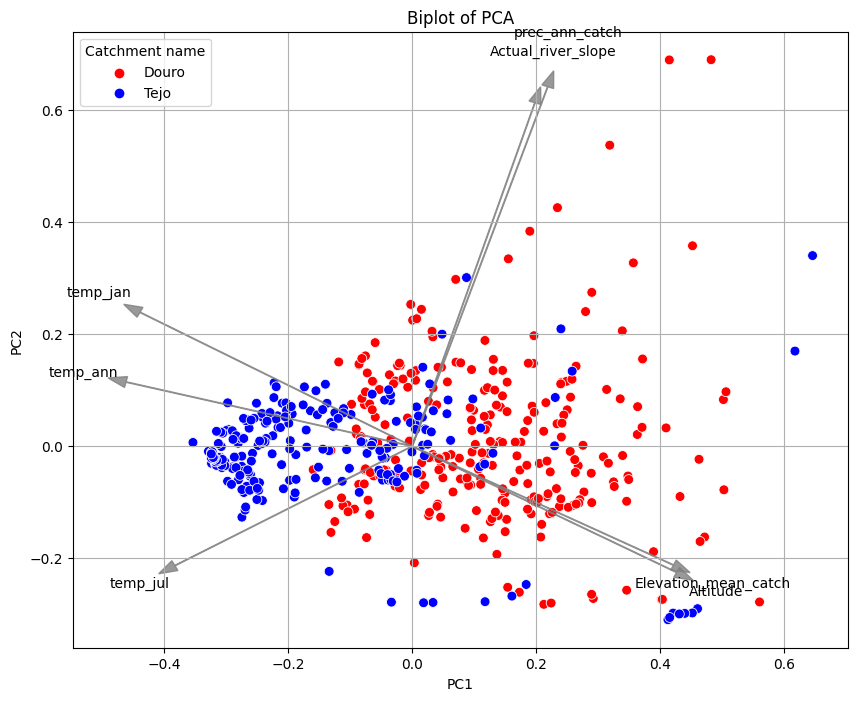

In [35]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que df_scaled es tu DataFrame escalado previamente

# Seleccionar las variables de interés
variables = ['Altitude', 'Actual_river_slope', 'Elevation_mean_catch', 'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul']
environmental_data = df_scaled[variables]

# Realizar el PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(environmental_data)

# Crear un DataFrame con los resultados del PCA
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Catchment_name'] = df_scaled['Catchment_name']

# Escalar los componentes principales
PC1 = pca_df['PC1'] / (pca_df['PC1'].max() - pca_df['PC1'].min())
PC2 = pca_df['PC2'] / (pca_df['PC2'].max() - pca_df['PC2'].min())

# Crear el biplot con rotación
def biplot(score, coef, labels=None, rotation=0):
    fig, ax = plt.subplots(figsize=(10, 8))
    plt.title('Biplot of PCA')
    
    xs = score[:, 0]  # PC1 object scores
    ys = score[:, 1]  # PC2 object scores 
    n = coef.shape[0]  # number of dimensions (2)
    
    # Rescale scores
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    
    # Scatter plot using rescaled object scores, colored by Catchment_name
    sns.scatterplot(x=xs * scalex, y=ys * scaley, hue=pca_df['Catchment_name'], palette={'Douro': 'red', 'Tejo': 'blue'}, s=50, ax=ax)
    
    # Plot arrows for each variable
    for i in range(n):
        plt.arrow(0, 0, coef[i, 0], coef[i, 1], color='gray', head_width=0.02, alpha=0.8)
        plt.text(coef[i, 0] * 1.15, coef[i, 1] * 1.15, labels[i], color='black', ha='center', va='center')

    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.legend(title='Catchment name')
    plt.grid()
    
    # Apply rotation if specified
    if rotation != 0:
        plt.gca().set_aspect('equal', adjustable='box')
        plt.gca().set_xlim([-1, 1])
        plt.gca().set_ylim([-1, 1])
        t = plt.gca().transData
        rot = t.rotate_deg(rotation)
        ax.set_transform(rot)

    plt.show()

# Etiquetas de las variables
labels = variables

# Obtener los coeficientes (cargas) del PCA
coef = pca.components_.T

# Crear el biplot con rotación opcional
biplot(principal_components, coef, labels, rotation=0)



c:\Users\cespe\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cespe\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cespe\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


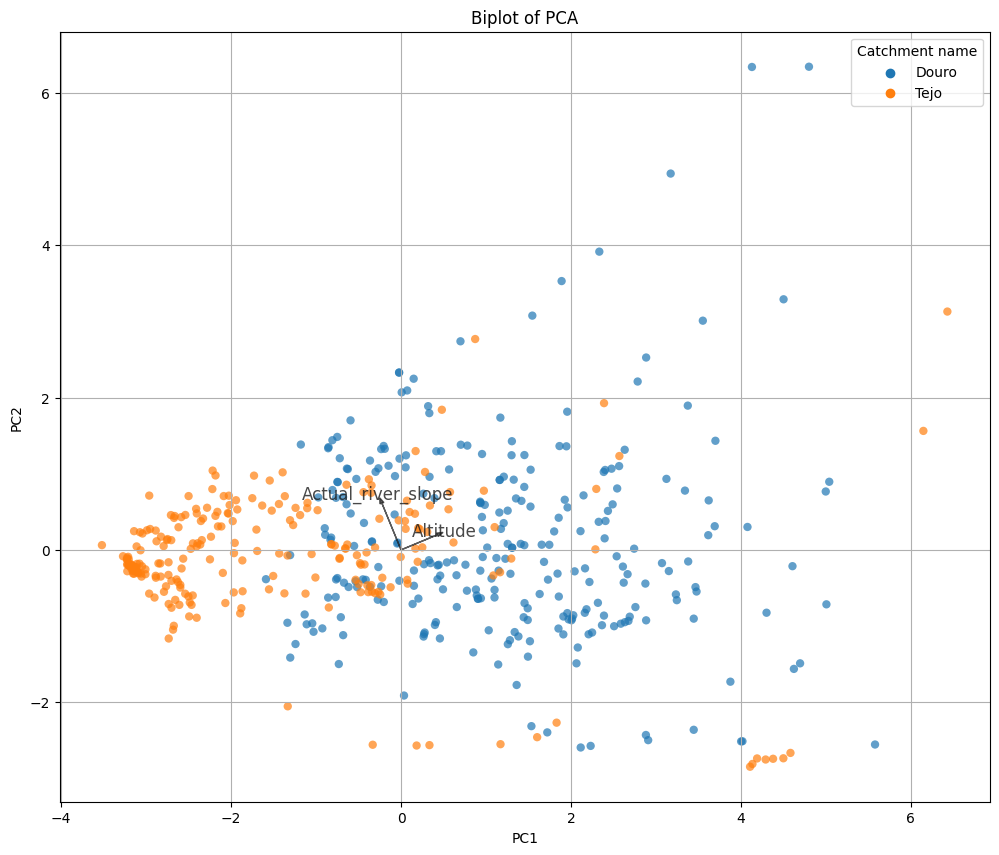

In [37]:
# Crear un DataFrame con los resultados del PCA
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['Catchment_name'] = df_scaled['Catchment_name']

# Crear el biplot
plt.figure(figsize=(12, 10))
plt.title('Biplot of PCA')

sns.scatterplot(x='PC1', y='PC2', hue='Catchment_name', data=pca_df, linewidth=0, alpha=0.7)

n = pca.components_.shape[0]  # number of dimensions (2)
for i in range(n):
    plt.arrow(0, 0, pca.components_[i, 0], pca.components_[i, 1], 
              color=(0.1, 0.1, 0.1, 0.8), head_width=0.05, alpha=0.7)  # plot arrows for each variable
    plt.text(pca.components_[i, 0] * 1.2, pca.components_[i, 1] * 1.2, 
             variables[i], color=(0.1, 0.1, 0.1, 0.8), ha='center', va='center', fontsize=12)  # variable labels for each arrow

plt.legend(title='Catchment name')
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid(True)
plt.show()



# Section 2: 

Using the same data, run a PCoA and project the sites using the resulting first two axis . Use also the Catchment_name ’ as a grouping variable.

c:\Users\cespe\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cespe\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cespe\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


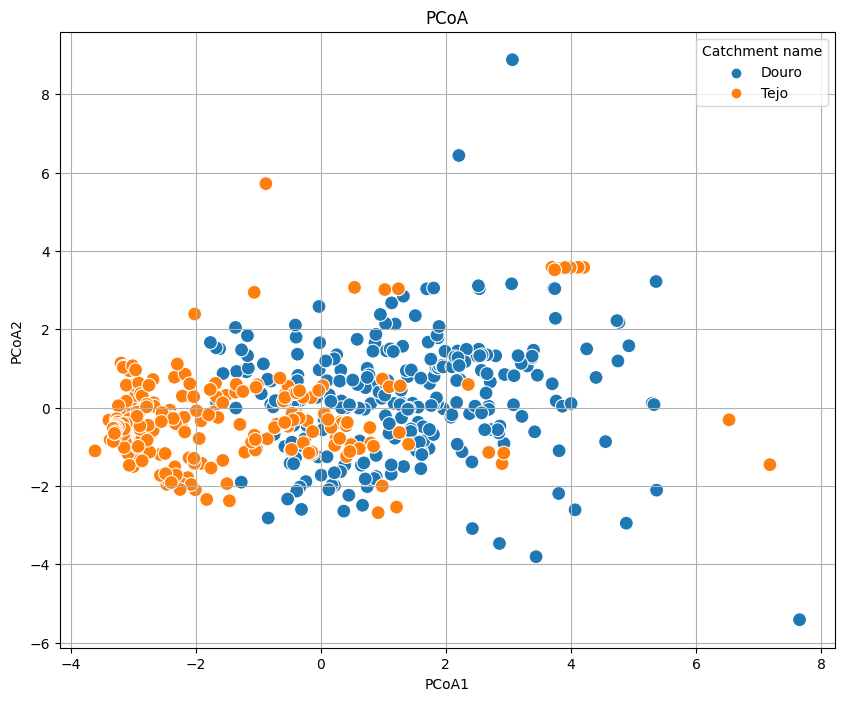

In [44]:
from sklearn.metrics import pairwise_distances
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de distancias (puedes ajustar la métrica según tus datos)
distances = pairwise_distances(df_scaled[variables], metric='euclidean')

# Ejecutar PCoA utilizando MDS
mds = MDS(n_components=2, dissimilarity='precomputed', random_state=42)
results = mds.fit_transform(distances)

# Crear un DataFrame con las coordenadas y el grupo 'Catchment_name'
pcoa_df = pd.DataFrame(data=results, columns=['PCoA1', 'PCoA2'])
pcoa_df['Catchment_name'] = df_scaled['Catchment_name']

# Visualizar los resultados
plt.figure(figsize=(10, 8))
plt.title('PCoA')
sns.scatterplot(x='PCoA1', y='PCoA2', hue='Catchment_name', data=pcoa_df, s=100)
plt.xlabel('PCoA1')
plt.ylabel('PCoA2')
plt.legend(title='Catchment name')
plt.grid(True)
plt.show()



# Section 3. 

Run a Linear Discriminant Analysis based on quantitative environmental variables (see previous
exercises), using the Douro and Tejo basins as the pre determined groups. Produce a biplot with
Catchment_name ’ as a grouping variable.

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier


c:\Users\cespe\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cespe\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cespe\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


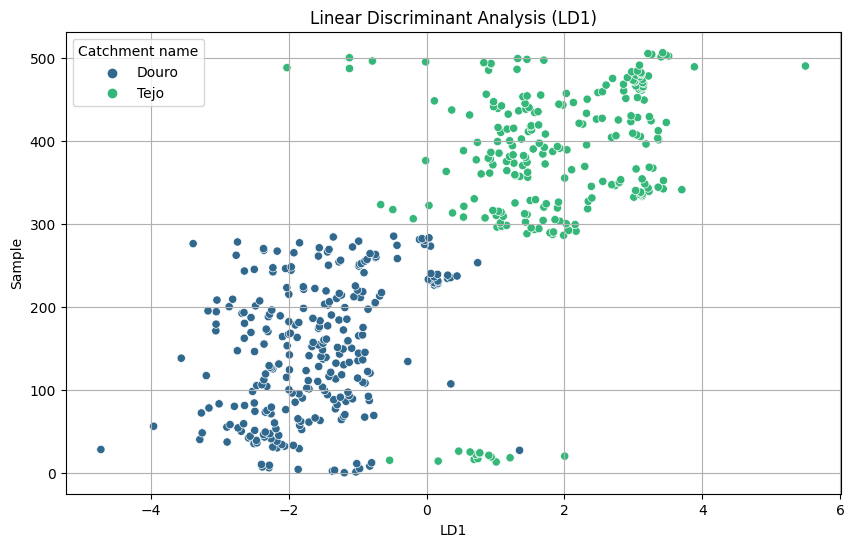

In [57]:
import pandas as pd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Suponiendo que df_scaled es tu DataFrame escalado con las características numéricas y 'Catchment_name'
X = df_scaled.drop('Catchment_name', axis=1)
y = df_scaled['Catchment_name']

# Codificar las etiquetas de clase
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Fit the LDA model with one component
model = LinearDiscriminantAnalysis(n_components=1)
lda = model.fit(X, y_encoded)

# Transform the data
lda_transformed = lda.transform(X)

# Create a DataFrame with the transformed data and the 'Catchment_name' group
lda_df = pd.DataFrame(data=lda_transformed, columns=['LD1'])
lda_df['Catchment_name'] = y

# Scatter plot
plt.figure(figsize=(10, 6))
plt.title('Linear Discriminant Analysis (LD1)')
sns.scatterplot(x='LD1', y=range(len(lda_df)), hue='Catchment_name', data=lda_df, palette='viridis')
plt.xlabel('LD1')
plt.ylabel('Sample')
plt.legend(title='Catchment name')
plt.grid(True)
plt.show()



